**Instacart Exploratory Data Analysis (EDA) Project**

**Project Description**
This project conducts an Exploratory Data Analysis (EDA) on a dataset provided by Instacart, an online grocery delivery service. The dataset contains a sample of anonymized order, product, aisle, and department information from real Instacart orders. The goal is to uncover insights into customer shopping behavior, product popularity, and order patterns to inform potential business strategies.

**Analysis Goal**
The primary objective of this EDA is to gain a comprehensive understanding of the Instacart dataset. This includes:
* **Understanding Customer Behavior:** Analyzing how customers place orders (e.g., reorder rates, order frequency, time of day/week preferences).
* **Identifying Popular Products & Categories:** Determining which products, aisles, and departments are most frequently purchased or reordered.
* **Exploring Order Patterns:** Investigating relationships between different aspects of orders, such as order size, timing, and product mix.
* **Deriving Actionable Insights:** Using visualizations and statistical summaries to identify trends and anomalies that could help Instacart optimize operations, marketing, or inventory management.

In [1]:
# Data Loading and Exploration
# Mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

instacart_data = pd.read_csv('instacart_orders.csv', sep=';')
products_data = pd.read_csv('products.csv', sep=';')
aisles_data = pd.read_csv('aisles.csv', sep=';')
departments_data = pd.read_csv('departments.csv', sep=';')
orders_data = pd.read_csv('order_products.csv', sep=';')

def analyze_data(df):
    # Info
    print(df.info())

    # First few rows
    print(df.head())

    # Missing values
    print(df.isna().sum())

    # Duplicates
    print(df.duplicated().sum())

In [2]:
# Initial exploration for the instacart df
analyze_data(instacart_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [3]:
# Initial exploration for the products df
analyze_data(products_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     49694 non-null  object 
 1   product_name   48311 non-null  object 
 2   aisle_id       49569 non-null  float64
 3   department_id  49569 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB
None
  product_id                                       product_name  aisle_id  \
0          1                         Chocolate Sandwich Cookies      61.0   
1          2                                   All-Seasons Salt     104.0   
2          3               Robust Golden Unsweetened Oolong Tea      94.0   
3          4  Smart Ones Classic Favorites Mini Rigatoni Wit...      38.0   
4          5                          Green Chile Anytime Sauce       5.0   

   department_id  
0           19.0  
1           13.0  
2            7.0  
3            1.0  
4           1

In [4]:
# Initial exploration for the aisles df 
analyze_data(aisles_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
aisle_id    0
aisle       0
dtype: int64
0


In [5]:
# Initial exploration for the departments df 
analyze_data(departments_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
department_id    0
department       0
dtype: int64
0


In [6]:
# Initial exploration for the orders df 
analyze_data(orders_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           1048575 non-null  int64  
 1   product_id         1048575 non-null  int64  
 2   add_to_cart_order  1048380 non-null  float64
 3   reordered          1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
order_id               0
product_id             0
add_to_cart_order    195
reordered              0
dtype: int64
0


### `orders` data frame

In [7]:
# Check for all orders placed Wednesday at 2:00 AM
orders_wed_twoam = instacart_data[(instacart_data['order_dow'] == 2) & (instacart_data['order_hour_of_day'] == 2)]
orders_wed_twoam

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [8]:
# Remove duplicate orders & resetting the index 
orders_data = orders_data.drop_duplicates().reset_index(drop=True)

### `products` data frame

In [9]:
# Check for fully duplicate rows
products_data.duplicated().any()

False

In [10]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_data['product_name'] = products_data['product_name'].str.lower()
products_data['product_name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool

In [11]:
# Check for duplicate product names that aren't missing
products_data[~products_data['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61.0,19.0
1,2,all-seasons salt,104.0,13.0
2,3,robust golden unsweetened oolong tea,94.0,7.0
3,4,smart ones classic favorites mini rigatoni wit...,38.0,1.0
4,5,green chile anytime sauce,5.0,13.0
...,...,...,...,...
49689,49690,high performance energy drink,64.0,7.0
49690,49691,original pancake & waffle mix,130.0,14.0
49691,49692,organic instant oatmeal light maple brown sugar,130.0,14.0
49692,49693,spring water body wash,127.0,11.0


## Find and remove missing values


### `products` data frame

In [12]:
# Identifying rows with missing product names
missing_product_names = products_data[products_data['product_name'].isna()]
missing_product_names

,product_id,product_name,aisle_id,department_id
37,38,NaN,100.0,21.0
71,72,NaN,100.0,21.0
104,"105;""Easy Grab 9\""""x13\"""" Oblong Glass Bakewar...",NaN,NaN,NaN
109,110,NaN,100.0,21.0
217,"218;""6\"""" Organic Carrot Cake"";8;3",NaN,NaN,NaN
...,...,...,...,...
49552,49553,NaN,100.0,21.0
49574,49575,NaN,100.0,21.0
49640,49641,NaN,100.0,21.0
49663,49664,NaN,100.0,21.0


 Are all of the missing product names associated with aisle ID 100?
 yes!

Are all of the missing product names associated with department ID 21?
yes!

What is this ailse and department?
aisle_id 100 and department_id 21

In [13]:
# Fill missing product names with 'Unknown'
products_data['product_name'] = products_data['product_name'].str.lower().fillna('unknown')
# checking the results 
products_data['product_name'].head(12), products_data['product_name'].tail(12), products_data['product_name'].sample(n=20)

(0                            chocolate sandwich cookies
 1                                      all-seasons salt
 2                  robust golden unsweetened oolong tea
 3     smart ones classic favorites mini rigatoni wit...
 4                             green chile anytime sauce
 5                                          dry nose oil
 6                        pure coconut water with orange
 7                     cut russet potatoes steam n' mash
 8                     light strawberry blueberry yogurt
 9        sparkling orange juice & prickly pear beverage
 10                                    peach mango juice
 11                           chocolate fudge layer cake
 Name: product_name, dtype: object,
 49682                                     cucumber kirby
 49683          vodka- triple distilled- twist of vanilla
 49684                 en croute roast hazelnut cranberry
 49685                                   artisan baguette
 49686         smartblend healthy metabolism dry

### `orders` data frame

In [14]:
#checking missing values where it's not a customer's first order.
missing_value_ncus_firstorder = ~(orders_data['reordered'] == 1) | \
                                ~(orders_data['order_id'].isin(orders_data[orders_data['reordered'] < 1]['order_id']))
missing_value_ncus_firstorder

0           True
1           True
2           True
3           True
4           True
           ...  
1048570     True
1048571    False
1048572     True
1048573     True
1048574    False
Length: 1048575, dtype: bool

In [15]:
# Are there any missing values where it's not a customer's first order?
missing_value_ncus_firstorder

0           True
1           True
2           True
3           True
4           True
           ...  
1048570     True
1048571    False
1048572     True
1048573     True
1048574    False
Length: 1048575, dtype: bool

### `order_products` data frame

In [16]:
# looking at the orders df again
orders_data.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [17]:
# What are the min and max values in this column?

orders_data['add_to_cart_order'].min(), orders_data['add_to_cart_order'].max()

(1.0, 64.0)

In [18]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# Find orders with at least one missing value in 'add_to_cart_order'
missing_value_orders = orders_data[orders_data['add_to_cart_order'].isna()]

# Extract unique order IDs with missing values
order_ids_with_missing_values = missing_value_orders['order_id'].unique() 

order_ids_with_missing_values

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594], dtype=int64)

In [19]:
# Do all orders with missing values have more than 64 products?

# Find orders with at least one missing value in 'add_to_cart_order'
missing_value_orders = orders_data[orders_data['add_to_cart_order'].isna()]

# Count the number of products in each order with missing values
product_counts = missing_value_orders.groupby('order_id')['product_id'].nunique()

# Check if all orders with missing values have more than 64 products
all_orders_more_than_64 = (product_counts > 64).all()

f"Do all orders with missing values have more than 64 products? {all_orders_more_than_64}"


'Do all orders with missing values have more than 64 products? False'

In [20]:
# Replace missing values with 999 and convert column to integer type
orders_data['add_to_cart_order'] = orders_data['add_to_cart_order'].fillna(999).astype(int)
# Checking results
orders_data['add_to_cart_order'].head(), orders_data['add_to_cart_order'].tail(), orders_data['add_to_cart_order'].sample(n=20)

(0    17
 1     1
 2     1
 3    35
 4     5
 Name: add_to_cart_order, dtype: int32,
 1048570    15
 1048571     9
 1048572    15
 1048573     4
 1048574    11
 Name: add_to_cart_order, dtype: int32,
 19561       1
 945199     31
 23670       6
 208779     18
 916752      7
 899425      9
 100379     12
 64332      10
 960793      8
 107148      5
 354746      4
 1020663     3
 723753     16
 410153     18
 458519      6
 1024361     2
 236555      8
 614150      1
 543280     18
 865670      2
 Name: add_to_cart_order, dtype: int32)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [21]:
# Looking at the instacart df again
instacart_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [22]:
# yes order_hour-of-day ranges from 0 to 23, and order_dow ranges from 0 to 6. Using min() & max() method to verify. 
instacart_data.min(), instacart_data.max()

(order_id                  4.0
 user_id                   2.0
 order_number              1.0
 order_dow                 0.0
 order_hour_of_day         0.0
 days_since_prior_order    0.0
 dtype: float64,
 order_id                  3421079.0
 user_id                    206209.0
 order_number                  100.0
 order_dow                       6.0
 order_hour_of_day              23.0
 days_since_prior_order         30.0
 dtype: float64)

### [A2] What time of day do people shop for groceries?

In [23]:
# What time of day do people shop for groceries?

order_times = instacart_data.groupby(['order_number', 'order_hour_of_day'])
order_times.max(), order_times.min()
# 24 / 7 

(                                order_id  user_id  order_dow  \
 order_number order_hour_of_day                                 
 1            0                   3382735   205908          6   
              1                   3404826   204411          6   
              2                   3407108   201752          6   
              3                   3397288   205935          6   
              4                   3321343   203091          6   
 ...                                  ...      ...        ...   
 100          19                  3334464   192373          6   
              20                  3038811   188947          3   
              21                  2918534   202554          6   
              22                  3052999   144805          3   
              23                  2118755   117435          4   
 
                                 days_since_prior_order  
 order_number order_hour_of_day                          
 1            0                      

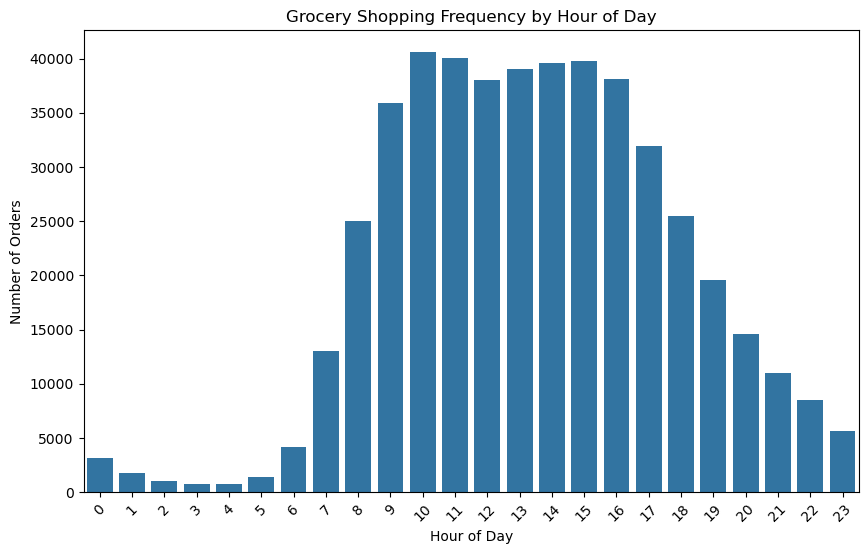

In [24]:
# Plot for what time of day do people shop for groceries

# Calculate the count of orders for each hour of the day
order_counts = instacart_data.groupby('order_hour_of_day').size().reset_index(name='order_count')

# Create a bar plot to visualize the order counts
plt.figure(figsize=(10, 6))
sns.barplot(x='order_hour_of_day', y='order_count', data=order_counts)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Grocery Shopping Frequency by Hour of Day')
plt.xticks(rotation=45)
plt.show()

Starting around 7 AM, order volume steadily increases, surpassing 10,000 orders. This trend continues with a significant surge to over 25,000 orders by 8 AM and further to over 35,000 orders by 9 AM. The peak shopping period occurs around 10 AM, with approximately 40,000 orders. This high level of activity persists until 4 PM. Thereafter, order volume gradually declines, reaching around 35,000 orders by 5 PM, 25,000 orders by 6 PM, 20,000 orders by 7 PM, 15,000 orders by 8 PM, and falling below 10,000 orders by 10 PM.

### [A3] What day of the week do people shop for groceries?

In [25]:
# Group by 'order_number' and 'order_dow'
grouped_data_dow = instacart_data.groupby(['order_number', 'order_dow'])

# Calculate order counts for 'order_dow' and 'order_number' 
grouped_data_dow.min(), grouped_data_dow.max()

# 7 days a week 

(                        order_id  user_id  order_hour_of_day  \
 order_number order_dow                                         
 1            0               114       40                  0   
              1              1343       20                  0   
              2               369        2                  0   
              3              1881       67                  0   
              4               548       34                  0   
 ...                          ...      ...                ...   
 100          2             26751    15221                  6   
              3              5354     3377                  0   
              4             51847     7175                  4   
              5             12323     6710                  6   
              6            381867     5191                  1   
 
                         days_since_prior_order  
 order_number order_dow                          
 1            0                             NaN  
   

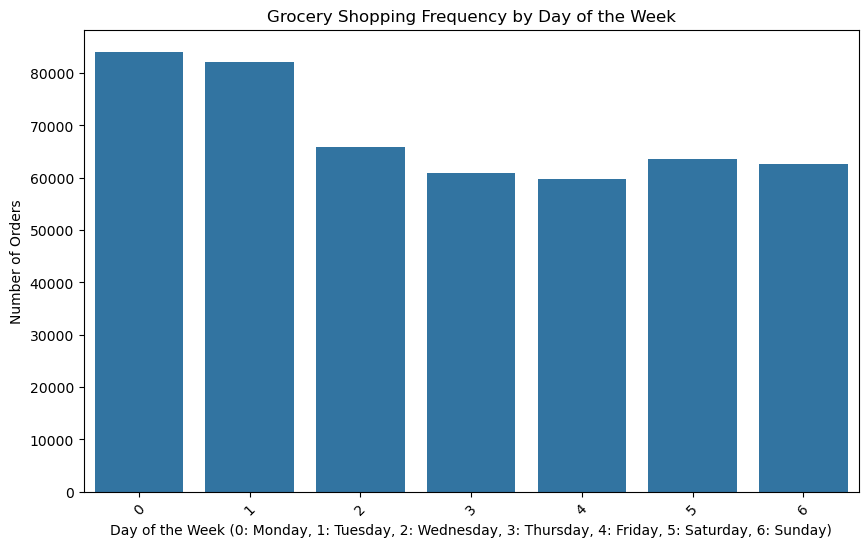

In [26]:
# Calculate the count of orders for each day of the week
order_counts_dow = instacart_data.groupby('order_dow').size().reset_index(name='order_count')

# Create a bar plot to visualize the order counts by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='order_dow', y='order_count', data=order_counts_dow)

# Customize the plot for better readability
plt.xlabel('Day of the Week (0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday)')
plt.ylabel('Number of Orders')
plt.title('Grocery Shopping Frequency by Day of the Week')
plt.xticks(rotation=45) 

plt.show()

Monday and Tuesday emerge as the busiest shopping days, with order volumes exceeding 80,000 on both days. In contrast, the remaining days of the week exhibit a more moderate shopping frequency, with order volumes generally hovering around 60,000.

### [A4] How long do people wait until placing another order?

In [27]:
wait_period = instacart_data.groupby(['user_id', 'days_since_prior_order'])
wait_period.size()

user_id  days_since_prior_order
2        8.0                       1
4        19.0                      1
         30.0                      1
5        19.0                      1
6        22.0                      1
                                  ..
206208   5.0                       1
         7.0                       5
         9.0                       1
206209   7.0                       1
         30.0                      1
Length: 369881, dtype: int64

In [28]:
# How long do people wait until placing another order
instacart_data['days_since_prior_order'].min(), instacart_data['days_since_prior_order'].max()

(0.0, 30.0)

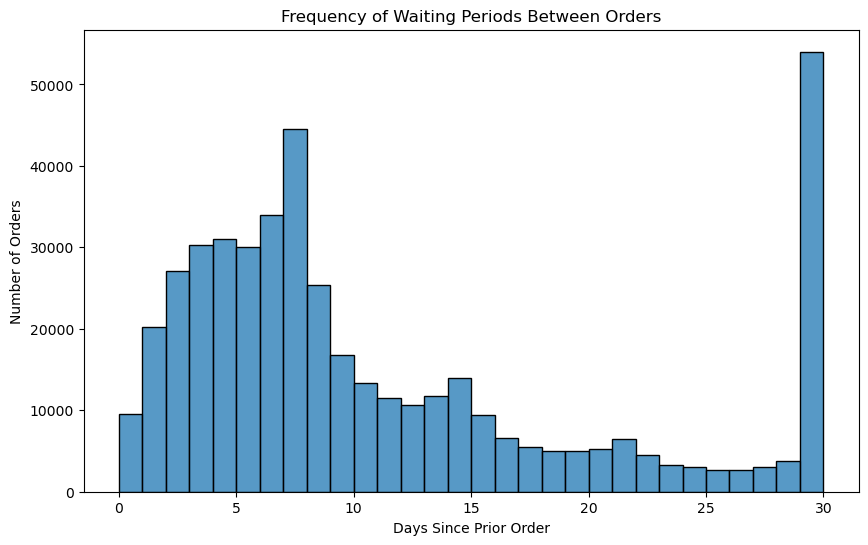

In [29]:
# Calculate the frequency of each waiting period
wait_period_freq = instacart_data.groupby('days_since_prior_order').size().reset_index(name='order_count')

# Create a histogram to visualize the waiting periods
plt.figure(figsize=(10, 6))
sns.histplot(data=wait_period_freq, x='days_since_prior_order', weights='order_count', bins=30) 
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Frequency of Waiting Periods Between Orders')
plt.show()

Monthly Stock-up: The most frequent reordering interval appears to be monthly, with customers waiting approximately 30 days between orders. This category exhibits the highest order volume, exceeding 50,000, suggesting a significant segment of customers prefers to stock up on groceries once a month.

Weekly Shoppers: Customers with weekly reordering intervals (around 7 days) represent another substantial group, with order volumes reaching approximately 45,000. This indicates a preference for more frequent, smaller shopping trips, potentially for replenishing essentials or incorporating fresh produce into their weekly meal plans.

Intermediate Intervals: Waiting periods of 3, 4, and 5 days demonstrate a moderate order volume of around 30,000. These customers likely prioritize freshness and convenience, reordering at a slightly faster pace than monthly shoppers.

Less Frequent Shoppers: Waiting periods between 16 and 29 days exhibit the lowest order volume, falling below 10,000. 

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

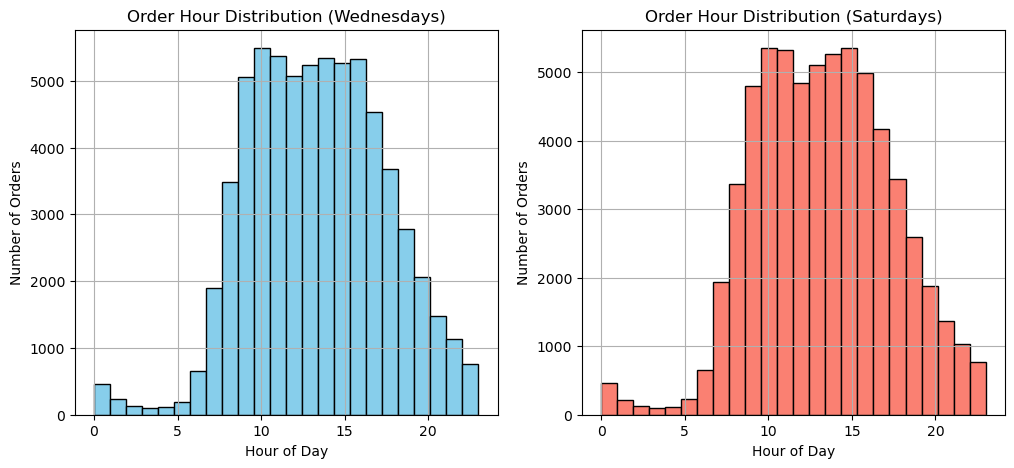

In [30]:

# Filter data for Wednesdays and Saturdays
wednesdays_data = instacart_data[instacart_data['order_dow'] == 2]  # 2 represents Wednesday
saturdays_data = instacart_data[instacart_data['order_dow'] == 5]  # 5 represents Saturday

# Create histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

wednesdays_data['order_hour_of_day'].hist(bins=24, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Order Hour Distribution (Wednesdays)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Orders')

saturdays_data['order_hour_of_day'].hist(bins=24, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Order Hour Distribution (Saturdays)')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Orders')

plt.show()

High Order Volume: Both days exhibit a significant surge in orders starting from 8 AM, reaching a peak around 10 AM. This suggests a strong morning rush on both weekdays and weekends

Similar Ordering Patterns: The overall shape and trends in ordering behavior are very similar between Wednesdays and Saturdays

Gradual Decline: Order volume gradually decreases after 6 PM on both days, with a noticeable drop below 2000 orders by 8 PM. This indicates a decline in ordering activity towards the evening

### [B2] What's the distribution for the number of orders per customer?

In [31]:
# What's the distribution for the number of orders per customer?
orders_per_user = instacart_data.groupby('user_id')['order_id'].count()

In [32]:
# What's the distribution for the number of orders per customer?
"Mean orders per user:", orders_per_user.mean(), "Median orders per user:", orders_per_user.median(), "Standard deviation:", orders_per_user.std(), "Minimum orders per user:", orders_per_user.min(), "Maximum orders per user:", orders_per_user.max()


('Mean orders per user:',
 3.042277228351658,
 'Median orders per user:',
 2.0,
 'Standard deviation:',
 2.7469897449129714,
 'Minimum orders per user:',
 1,
 'Maximum orders per user:',
 28)

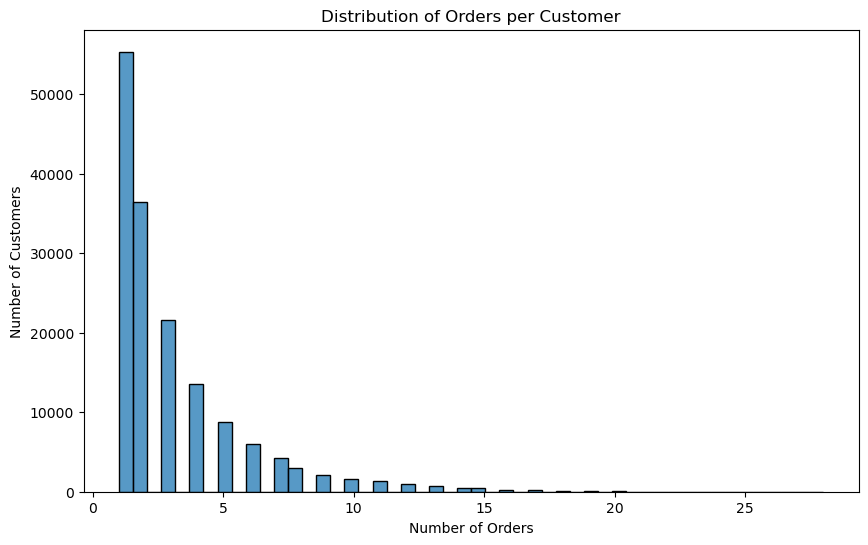

In [33]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_user, bins=50)  
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

A significant portion of customers, exceeding 50,000, have placed one to two orders.
A group of around 35,000 customers have placed between 3 and 4 orders.
10,000 customers have placed 4 to 5 orders, suggesting a higher level of engagement and potential for increased loyalty.
A smaller but significant segment, ranging from 3,000 to 1,000 customers, have placed 20 or fewer orders. This group represents the most frequent shoppers. 

### [B3] What are the top 20 popular products (display their id and name)?

In [34]:
# Merge order_products with products to get product names
products_data['product_id'] = pd.to_numeric(products_data['product_id'], errors='coerce')
merged_orders_products = pd.merge(orders_data, products_data, on='product_id', how='left')
merged_orders_products.sample(n=20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
909191,2578059,24852,1,1,banana,24.0,4.0
524055,555084,13176,2,1,bag of organic bananas,24.0,4.0
44162,2373333,24413,4,1,organic strawberry banana fruit yogurt smoothie,92.0,18.0
1004235,3322808,44799,5,1,fresh ca grown eggs,86.0,16.0
99939,3265153,8424,11,1,broccoli crown,83.0,4.0
988308,3317344,859,2,0,2-ply everyday napkins,54.0,17.0
90625,76753,22825,6,0,organic d'anjou pears,24.0,4.0
6622,2379015,47766,13,1,organic avocado,24.0,4.0
687932,2593995,12980,16,0,large greenhouse tomato,83.0,4.0
884890,1972617,35613,3,1,original thin supreme pizza,79.0,1.0


In [35]:
# Group by product_id and count the occurrences
product_counts = merged_orders_products.groupby('product_id').size().reset_index(name='count')
product_counts.sample(n=20)

,product_id,count
19176,26785,4
19832,27696,27
6470,9055,12
21225,29642,15
22012,30754,8
23298,32569,22
20815,29060,1
20289,28340,2
11376,15945,54
765,1080,22


In [36]:
# Merge product_counts with products_df to get product names
product_counts_with_names = pd.merge(product_counts, products_data[['product_id', 'product_name']], on='product_id', how='left')
product_counts_with_names.sample(n=20)

,product_id,count,product_name
17648,24629,9,sweet mini sub rolls
25133,35135,14,unknown
10618,14909,1,antibacterial gentle cleansing bar
20651,28842,1500,bunched cilantro
20352,28424,3,tex mex jackfruit
3991,5576,1,deli fresh maple honey ham- bold- 97% fat free...
28517,39905,3,vegan dark chocolate ice cream
25299,35362,5,andouille
12127,16978,16,organic forbidden rice
24882,34773,1,natural instincts non-permanent hair color nut...


In [37]:
# Sort by count in descending order and get top 20
top_20_products = product_counts_with_names.sort_values(by='count', ascending=False).head(20)
top_20_products.head(20)

,product_id,count,product_name
17807,24852,15184,banana
9369,13176,12301,bag of organic bananas
15133,21137,8573,organic strawberries
15687,21903,7900,organic baby spinach
33772,47209,6951,organic hass avocado
34177,47766,5778,organic avocado
34073,47626,4982,large lemon
19936,27845,4602,organic whole milk
11995,16797,4591,strawberries
18751,26209,4462,limes


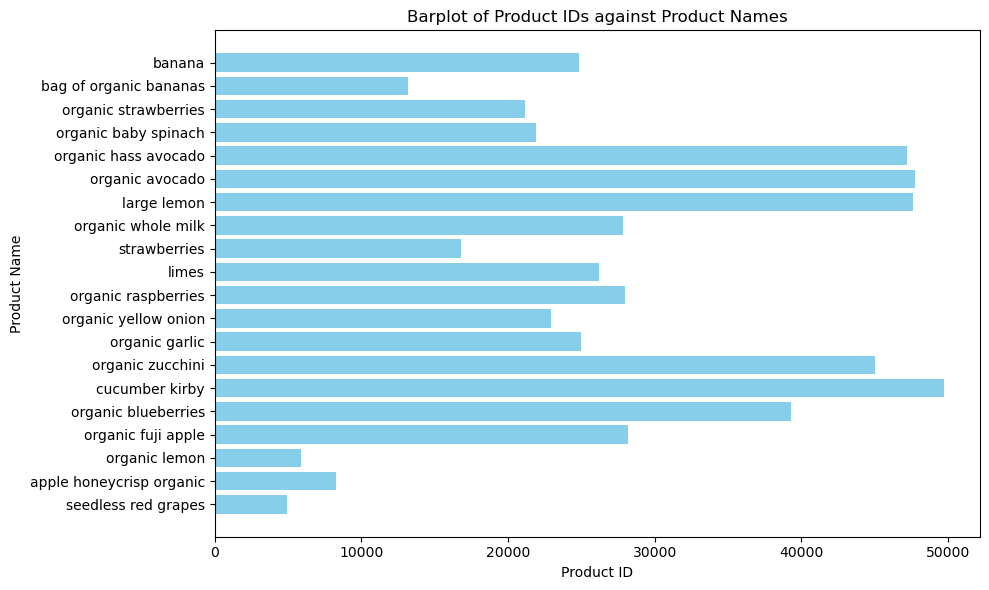

In [38]:
# Creating a plot for the top 20 popular products names 

plt.figure(figsize=(10,6))
plt.barh(top_20_products['product_name'], top_20_products['product_id'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Product Name')
plt.title('Barplot of Product IDs against Product Names')
plt.gca().invert_yaxis()  # To have the first product on top
plt.tight_layout()
plt.show()

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [39]:
# Count the number of products in each order
order_sizes = orders_data.groupby("order_id")["product_id"].count()
order_sizes.sample(n=20)

order_id
2191637     7
93104       2
1721664     4
40498       8
872063      4
825546      6
2246445     1
2695003     4
906796      5
1965207     2
798830      2
1523804     3
2236330     1
288888      1
1581860     3
189429      1
2273316     5
1510036     5
3374979     1
2714468    13
Name: product_id, dtype: int64

In [40]:
# Calculate summary statistics
mean_order_size = order_sizes.mean()
median_order_size = order_sizes.median()
f"Mean order size: {mean_order_size:.2f}"
f"Median order size: {median_order_size:.2f}"

'Median order size: 2.00'

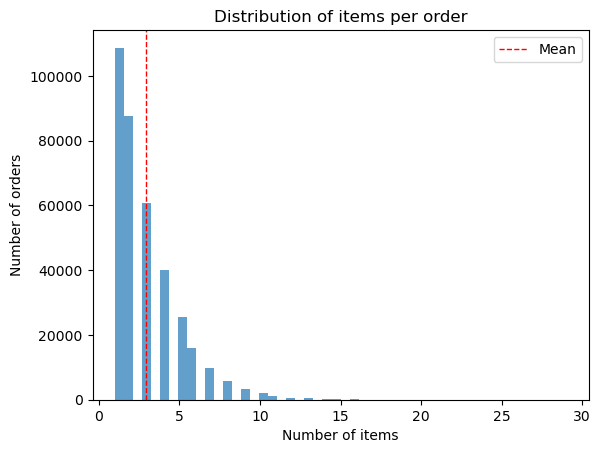

In [41]:
# Visualize the distribution

plt.hist(order_sizes, bins=50, alpha=0.7)
plt.axvline(order_sizes.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
plt.title('Distribution of items per order')
plt.show()

The analysis reveals that the median order size is 8 items. 

Small Orders: Orders containing 1-2 items are the most frequent, exceeding 80,000 instances. 

Medium Orders: Orders with 5-7 items represent another significant segment, with around 60,000 occurrences. 

Large Orders: Orders containing 8-10 items are slightly less frequent, occurring below 40,000 times. 

Very Large Orders: Orders with 16-20 items are considerably less frequent, occurring around 20,000 times. 

Extremely Large Orders: Orders exceeding 20 items are the least frequent, occurring below 10,000 times. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [42]:
# Filter for reordered items
reordered_df = orders_data[orders_data['reordered'] == 1]
reordered_df.sample(n=10)

,order_id,product_id,add_to_cart_order,reordered
445937,1587162,30192,2,1
921097,3125621,48364,6,1
970386,2778537,33198,5,1
442914,1281917,16920,8,1
818940,442405,18900,3,1
1004670,2398356,21903,20,1
781091,1838274,47734,8,1
619053,1733669,40198,11,1
873550,906511,9339,5,1
935454,702679,30391,19,1


In [43]:
# Group by product_id and count the number of reorders
product_reorder_counts = reordered_df.groupby('product_id').size().reset_index(name='reorder_count')
product_reorder_counts.sample(n=10)

,product_id,reorder_count
26113,49431,1
21318,40301,4
23466,44343,1
21595,40803,2
1414,2689,2
3524,6652,8
11735,22173,1
17002,32237,3
15906,30121,32
16233,30759,8


In [44]:
# Merge with product names
top_reordered_products = pd.merge(product_reorder_counts, products_data[['product_id', 'product_name']], on='product_id', how='left')
top_reordered_products.sample(n=10)

,product_id,reorder_count,product_name
17381,32923,26,organic triple berry blend
11182,21134,13,cream top apricot mango fruit on the bottom yo...
23722,44838,1,yucatan sunshine habanero pepper sauce
16748,31724,16,mini yellow rounds corn tortilla chips
5371,10177,2,german barrel sauerkraut
3079,5812,2,natural calm magnesium supplement
25918,49031,3,ale- hop stoopid
10410,19639,1,spaghetti & meatballs
25567,48336,1,picante mild sauce
9317,17649,1,rich & hearty chicken pot pie style chowder soup


In [45]:
# Sort by reorder count in descending order and get top 20
top_20_reordered = top_reordered_products.sort_values(by='reorder_count', ascending=False).head(20)

In [46]:
# The top 20 items that are reordered most frequently
top_20_reordered.head(20)

,product_id,reorder_count,product_name
13151,24852,12831,banana
6915,13176,10237,bag of organic bananas
11184,21137,6636,organic strawberries
11591,21903,6034,organic baby spinach
24958,47209,5499,organic hass avocado
25239,47766,4374,organic avocado
14696,27845,3833,organic whole milk
25163,47626,3483,large lemon
14763,27966,3386,organic raspberries
8858,16797,3196,strawberries


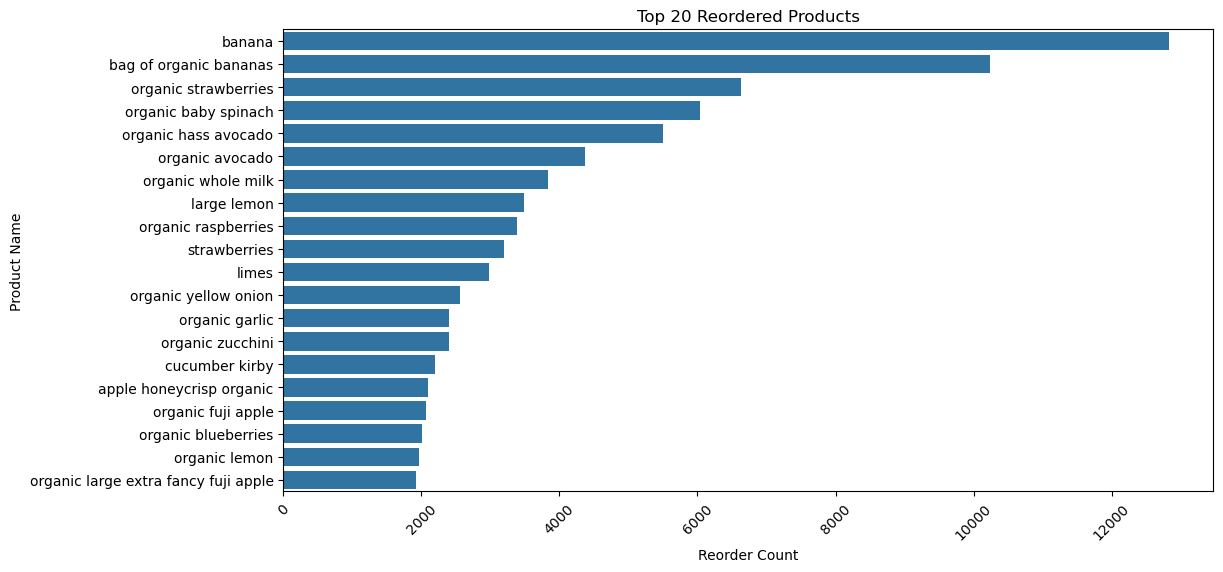

In [47]:
# Create a bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='reorder_count', y='product_name', data=top_20_reordered)
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')
plt.title('Top 20 Reordered Products')
plt.xticks(rotation=45) 
plt.show()

### [C3] For each product, what proportion of its orders are reorders?

In [48]:
# Calculate total orders for each product
total_orders_per_product = orders_data.groupby('product_id').size().reset_index(name='total_orders')
total_orders_per_product.sample(n=12)

,product_id,total_orders
10800,15158,2
29973,41922,2
15089,21080,1
7249,10152,4
29343,41062,4
6298,8811,16
4763,6659,4
30682,42903,30
34628,48388,1
34567,48298,4


In [49]:
# Calculate reordered orders for each product
reordered_orders_per_product = orders_data[orders_data['reordered'] == 1].groupby('product_id').size().reset_index(name='reordered_orders')
reordered_orders_per_product.sample(n=12)

,product_id,reordered_orders
10412,19644,3
16501,31273,10
22972,43457,1
25278,47838,6
16110,30539,1
3690,6985,10
19757,37349,20
11230,21235,1
13345,25236,1
22162,41889,4


In [50]:
# Merge the two DataFrames
merged_df = pd.merge(total_orders_per_product, reordered_orders_per_product, on='product_id', how='left')
merged_df['reordered_orders'] = merged_df['reordered_orders'].fillna(0)  # Handle products with no reorders
merged_df['reordered_orders'].sample(n=10)

905        1.0
2739      20.0
5512       2.0
5051       2.0
20655    115.0
30560      2.0
27343      1.0
5437       0.0
13464      0.0
17855      2.0
Name: reordered_orders, dtype: float64

In [51]:
# Calculate the proportion of reordered orders
merged_df['reorder_proportion'] = merged_df['reordered_orders'] / merged_df['total_orders']

In [52]:
# Display the results
merged_df[['product_id', 'total_orders', 'reordered_orders', 'reorder_proportion']]

,product_id,total_orders,reordered_orders,reorder_proportion
0,1,63,39.0,0.619048
1,2,4,0.0,0.000000
2,3,10,8.0,0.800000
3,4,4,1.0,0.250000
4,8,2,0.0,0.000000
...,...,...,...,...
35559,49690,4,3.0,0.750000
35560,49691,30,13.0,0.433333
35561,49692,7,3.0,0.428571
35562,49693,8,2.0,0.250000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [53]:
# Merge orders and order_products DataFrames
merged_df = pd.merge(orders_data, instacart_data[['order_id', 'user_id']], on='order_id', how='left')
merged_df.sample(n=10)

,order_id,product_id,add_to_cart_order,reordered,user_id
1683,1926050,16759,8,1,41080
157104,3322954,2611,11,0,7974
467047,2060402,9743,23,1,52644
14908,1106819,26119,2,1,41731
596057,3354112,27796,1,1,174879
1024126,989058,45957,11,0,11575
417545,455825,8277,4,0,129442
588357,910333,23734,3,1,169868
244981,1239363,31630,1,1,91094
490537,1794188,25511,8,0,157609


In [54]:
# Calculate total orders per user
total_orders_per_user = merged_df.groupby('user_id').size().reset_index(name='total_orders')
total_orders_per_user.sample(n=10)

,user_id,total_orders
106139,162045,5
4820,7296,8
99242,151638,10
48411,73959,10
64318,98064,3
86562,132285,2
130335,198787,1
86606,132347,9
111869,170823,5
116807,178336,2


In [55]:
# Calculate reordered orders per user
reordered_orders_per_user = merged_df[merged_df['reordered'] == 1].groupby('user_id').size().reset_index(name='reordered_orders')
reordered_orders_per_user.sample(n=10)

,user_id,reordered_orders
95819,186514,15
12954,25206,1
11112,21686,12
52010,101034,15
26199,51070,6
54606,105961,3
39218,76383,16
40929,79707,1
94956,184935,3
77911,151826,15


In [56]:
# Merge total and reordered orders per user
merged_user_df = pd.merge(total_orders_per_user, reordered_orders_per_user, on='user_id', how='left')
merged_user_df['reordered_orders'] = merged_user_df['reordered_orders'].fillna(0)

In [57]:
# Calculate proportion of reordered orders per user
merged_user_df['reorder_proportion'] = merged_user_df['reordered_orders'] / merged_user_df['total_orders']

In [58]:
# Display the results
merged_user_df[['user_id', 'total_orders', 'reordered_orders', 'reorder_proportion']]

,user_id,total_orders,reordered_orders,reorder_proportion
0,2,4,0.0,0.000000
1,4,1,0.0,0.000000
2,7,5,4.0,0.800000
3,11,4,1.0,0.250000
4,13,4,3.0,0.750000
...,...,...,...,...
135116,206203,9,2.0,0.222222
135117,206206,7,4.0,0.571429
135118,206207,11,9.0,0.818182
135119,206208,28,18.0,0.642857


### [C5] What are the top 20 items that people put in their carts first? 

In [59]:
# Filter for the first item in each order
first_item_df = orders_data[orders_data['add_to_cart_order'] == 1]
first_item_df.sample(n=10)

,order_id,product_id,add_to_cart_order,reordered
922103,3372875,19820,1,1
98314,86265,1250,1,0
406480,774860,31634,1,1
648721,1725159,33719,1,1
857874,400920,24232,1,1
699577,2777588,11707,1,1
978975,904560,28985,1,0
496792,3345775,5077,1,1
513990,3185519,5258,1,1
951704,253046,7243,1,0


In [60]:
# Group by product_id and count the occurrences
first_item_counts = first_item_df.groupby('product_id').size().reset_index(name='first_item_count')
first_item_counts.sample(n=10)

,product_id,first_item_count
12772,41414,1
11684,37931,2
11083,35943,1
1228,4003,2
1394,4538,1
4930,16031,3
12505,40470,2
12412,40198,16
13165,42728,3
5790,18839,1


In [61]:
# Merge with product names
first_item_with_names = pd.merge(first_item_counts, products_data[['product_id', 'product_name']], on='product_id', how='left')
first_item_with_names.sample(n=10)

,product_id,first_item_count,product_name
9246,30113,1,women's one food-based multivitamin
501,1569,1,cold shredded chicken
13362,43452,2,japanese style noodles & chicken flavored sauce
12304,39814,3,hawaiian style teriyaki chicken bowl
14127,45873,1,chai spice black tea bags
8328,27171,5,bread crumbs
8037,26246,2,mini double caramel ice cream bars
13920,45211,1,organic french fingerling potato
8562,27930,2,real pure acai
5956,19382,6,crunch granola bar chocolate chip


In [62]:
# Sort by count in descending order and get top 20
top_20_first_items = first_item_with_names.sort_values(by='first_item_count', ascending=False).head(20)

In [63]:
# Display the top 20 first items
top_20_first_items[['product_id', 'product_name', 'first_item_count']]

,product_id,product_name,first_item_count
7609,24852,banana,3538
4065,13176,bag of organic bananas,2541
8533,27845,organic whole milk,1046
6473,21137,organic strawberries,909
14561,47209,organic hass avocado,786
6713,21903,organic baby spinach,766
14719,47766,organic avocado,714
6042,19660,spring water,555
5142,16797,strawberries,542
8580,27966,organic raspberries,468


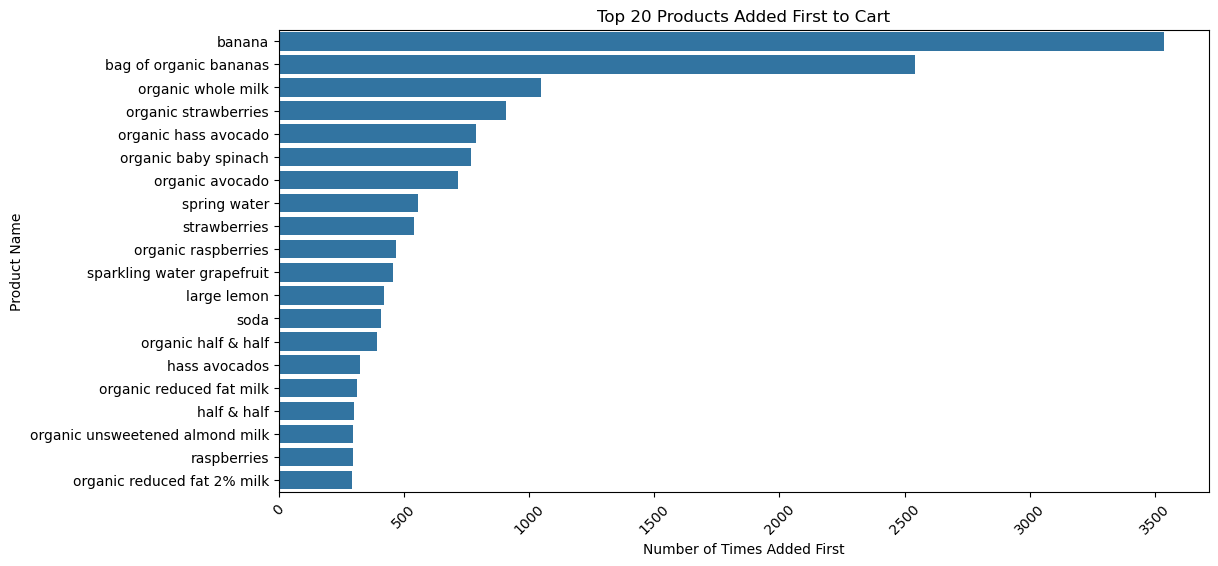

In [64]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='first_item_count', y='product_name', data=top_20_first_items)
plt.xlabel('Number of Times Added First')
plt.ylabel('Product Name')
plt.title('Top 20 Products Added First to Cart')
plt.xticks(rotation=45) 
plt.show()

**Conclusion: Key Insights from Instacart Order Patterns**

This Exploratory Data Analysis reveals significant patterns in Instacart customer behavior and order characteristics.

**Temporal Ordering Trends:**
* Daily order volume consistently **surges in the morning**, peaking around **10 AM (approx. 40,000 orders)**, and maintains high activity until **4 PM**, before gradually declining into the evening.
* **Mondays and Tuesdays are the busiest shopping days**, consistently exceeding 80,000 orders, suggesting a strong start-of-week stocking trend. Other weekdays and weekends show moderate activity around 60,000 orders.
* Both **Wednesdays and Saturdays exhibit remarkably similar ordering patterns**, with a strong morning rush and a decline after 6 PM, implying consistent daily routines regardless of weekday/weekend status.

**Customer Reordering & Engagement:**
* Customers strongly favor **monthly stock-up (around 30 days) as the most frequent reordering interval**, leading to the highest order volume (over 50,000).
* **Weekly shoppers (around 7 days) form another substantial group**, preferring more frequent, smaller trips.
* A significant portion of customers (over 50,000) are **new or less frequent users, placing 1 to 2 orders**. However, a highly engaged segment of customers (3,000 to 1,000 users) demonstrates high loyalty by placing **20 or more orders**.

**Order Size:**
* The **median order size is 8 items**.
* **Small orders (1-2 items) are the most frequent**, highlighting quick fill-up or single-item purchases.
* Medium (5-7 items) and moderately large (8-10 items) orders also contribute significantly, while very large orders (16+ items) are considerably less common.

**Overall Implications:**
Instacart's operations could benefit from understanding these clear peak times (mornings, early week), distinct reordering behaviors (monthly stock-up vs. weekly essentials), and varied customer engagement levels to optimize staffing, inventory, and targeted marketing campaigns.